In [16]:
!pip install --user tensorflow matplotlib

  Using cached matplotlib-3.8.2-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.47.2-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl (56 kB)
  Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl (181 kB)
  Using cached pillow-10.2.0-cp39-cp39-win_amd64.whl (2.6 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [20]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.0.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.1.0
astunparse                   1.6.3
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.15.1
charset-normalizer           3.3.2
click                        8.1.3
colorama                     0.4.6
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    1.2.0
fastjsonschema               2.16.2
Flask                        2.2.2
Flask-Cors                   3.0.10
f

In [5]:
import tensorflow as tf
import os

In [8]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [64]:
train_dir = 'data/train'
val_dir = 'data/val'
os.listdir(train_dir)

['NORMAL', 'PNEUMONIA']

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [141]:
val_data = tf.keras.utils.image_dataset_from_directory(val_dir)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 16 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.


In [66]:
train_data_iterator = train_data.as_numpy_iterator()

In [67]:
train_batch = train_data_iterator.next()
train_batch[0].shape

(32, 256, 256, 3)

In [68]:
train_batch[1]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

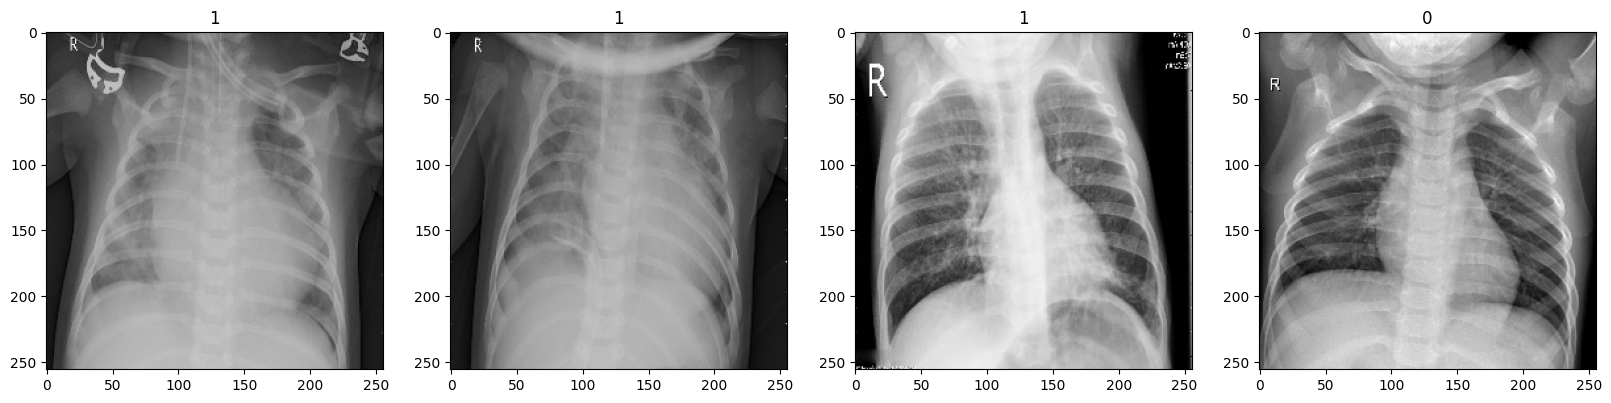

In [69]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

In [142]:
train_data = train_data.map(lambda x,y: (x/255, y))
val_data = val_data.map(lambda x,y: (x/255, y))

In [71]:
train_data.as_numpy_iterator().next()
val_data.as_numpy_iterator().next()

(array([[[[7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          ...,
          [5.08578420e-02, 5.08578420e-02, 5.08578420e-02],
          [4.14215699e-02, 4.14215699e-02, 4.14215699e-02],
          [2.68478096e-02, 2.68478096e-02, 2.68478096e-02]],
 
         [[7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          ...,
          [4.69362736e-02, 4.69362736e-02, 4.69362736e-02],
          [3.62994038e-02, 3.62994038e-02, 3.62994038e-02],
          [1.37867648e-02, 1.37867648e-02, 1.37867648e-02]],
 
         [[7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          ...,
          [4.30147052e-02, 4.30147052e-02, 4.3014

In [80]:
val_data.as_numpy_iterator().next()[0].max()

1.0

In [81]:
train = train_data.take(int(len(train_data)))
val= val_data.take(int(len(val_data)))


In [145]:
#validation from the training data

train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)

train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [147]:
model = Sequential()

In [148]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [149]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [150]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [151]:
logdir='logs'

In [152]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [155]:
hist = model.fit(train, epochs=11, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/11
130/130 [==============================] - 48s 337ms/step - loss: 0.1937 - accuracy: 0.9147 - val_loss: 0.1042 - val_accuracy: 0.9639
Epoch 2/11
130/130 [==============================] - 40s 305ms/step - loss: 0.1013 - accuracy: 0.9635 - val_loss: 0.1206 - val_accuracy: 0.9600
Epoch 3/11
130/130 [==============================] - 39s 300ms/step - loss: 0.0743 - accuracy: 0.9733 - val_loss: 0.0826 - val_accuracy: 0.9717
Epoch 4/11
130/130 [==============================] - 40s 304ms/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.0924 - val_accuracy: 0.9697
Epoch 5/11
130/130 [==============================] - 41s 310ms/step - loss: 0.0534 - accuracy: 0.9812 - val_loss: 0.1038 - val_accuracy: 0.9648
Epoch 6/11
130/130 [==============================] - 40s 308ms/step - loss: 0.0394 - accuracy: 0.9863 - val_loss: 0.0860 - val_accuracy: 0.9736
Epoch 7/11
130/130 [==============================] - 41s 311ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0988 - val_ac

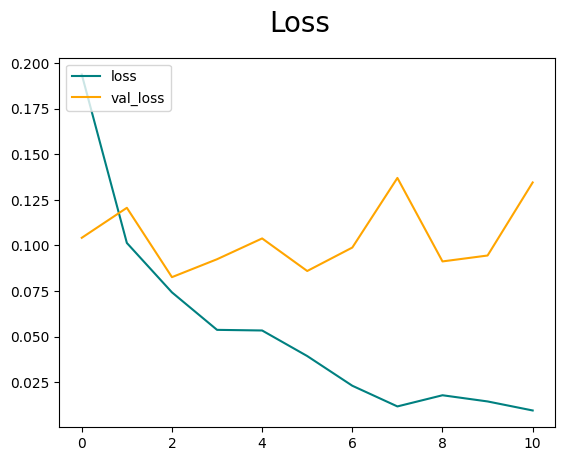

In [156]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

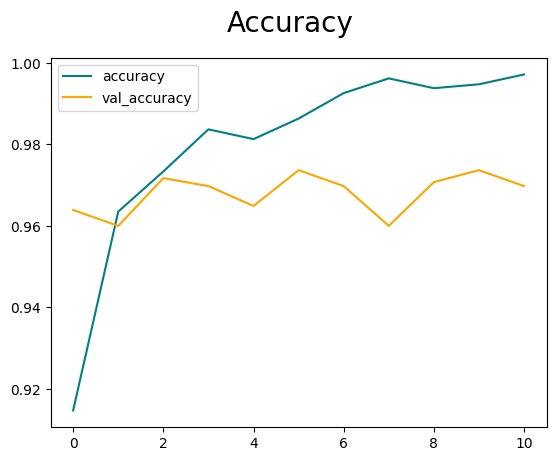

In [157]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [158]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [159]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [160]:
test_data = tf.keras.utils.image_dataset_from_directory('data/test')

Found 624 files belonging to 2 classes.


In [161]:
test_data = test_data.map(lambda x,y: (x/255, y))
test_data.as_numpy_iterator().next()
test = test_data.take(int(len(test_data)))

In [162]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 256ms/step


In [163]:
f1_score = (2 * (pre.result().numpy() * re.result().numpy())) / (pre.result().numpy() + re.result().numpy())
f1_score

0.8229055907035129

In [164]:
print(f'Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()},Precision: {pre.result().numpy()}')

Recall: 0.9948717951774597,Accuracy: 0.7323718070983887,Precision: 0.7016274929046631


In [165]:
import cv2

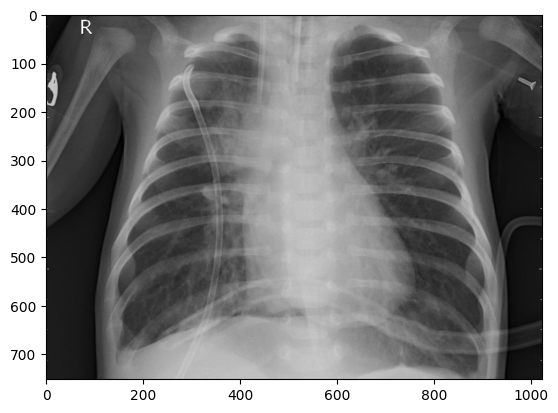

In [166]:
img = cv2.imread('person109_bacteria_517.jpeg')
plt.imshow(img)
plt.show()

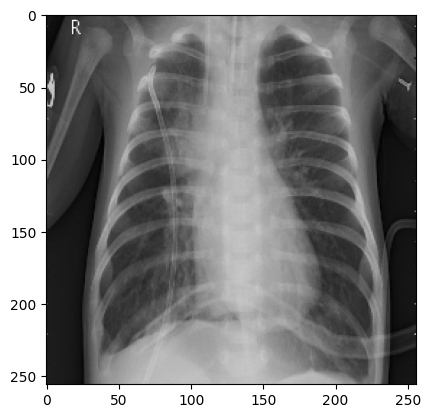

In [167]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [168]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 74ms/step


In [169]:
yhat

array([[1.]], dtype=float32)

In [3]:
from tensorflow.keras.models import load_model

In [170]:
model.save(os.path.join('models','normalPneumoniaV3.keras'))

In [171]:
new_model=load_model(os.path.join('models','normalPneumoniaV2.keras'))

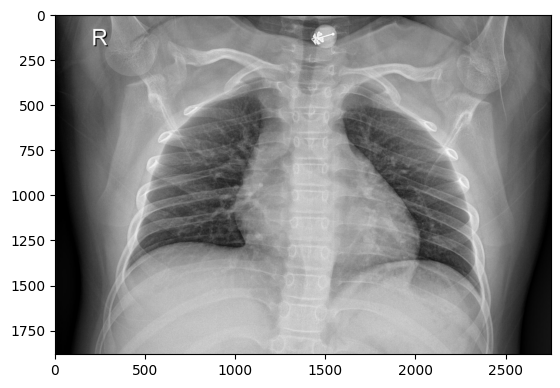

In [187]:
img = cv2.imread('IM-0050-0001.jpeg')
plt.imshow(img)
plt.show()

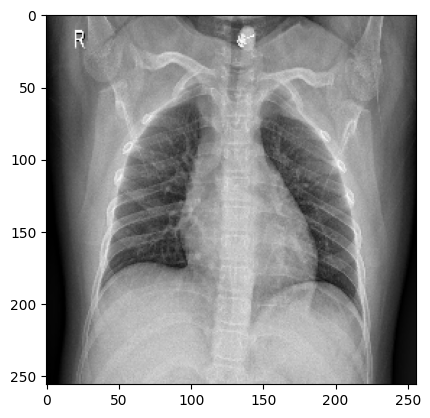

In [188]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [189]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


In [190]:
yhatnew

array([[7.092141e-05]], dtype=float32)

In [191]:
if yhatnew > 0.5: 
    print(f'Predicted class Has Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Normal
